# Comparing Positive, Negative, and Equivocal Samples

This noteboook compares her2 scores and her2 percent positive across positive, negative, and equivocal samples. For now, this is devoid of machine learning data.

In [1]:
require(readr)
require(ggplot2)
require(reshape2)
require(dplyr)

Loading required package: readr
Loading required package: ggplot2
Loading required package: reshape2
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



>`gene.expr` contains gene expression data. This may or may not prove useful.

>`her2.data` contains her2 clinical data.

In [2]:
gene.expr <- as.data.frame(read_tsv('../data/GSM1536837_06_01_15_TCGA_24.tumor_Rsubread_FeatureCounts.txt.gz'))
her2.data <- as.data.frame(read_tsv('../data/her2_Clinical_Data.tsv'))

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_integer(),
  X1 = col_character()
)
See spec(...) for full column specifications.
Warning message:
“Missing column names filled in: 'X1' [1], 'X2' [2], 'X3' [3]”Parsed with column specification:
cols(
  .default = col_character()
)
See spec(...) for full column specifications.


>I like samples to be rows and different variables to be columns. Also, we may want to merge these dataframes at some point, so I will transpose them.

In [3]:
row.names(gene.expr) <- gene.expr$X1
gene.expr$X1 <- NULL
row.names(her2.data) <- her2.data$X1
her2.data$X1 <- NULL
her2.data$X2 <- NULL
her2.data$X3 <- NULL

gene.expr <- as.data.frame(t(gene.expr))
her2.data <- as.data.frame(t(her2.data))

In [4]:
# Commenting this out because I don't want to have to deal with the warning messages or having to scroll through this

#NOTE: These next few chunks are only useful if I decide to merge the two dataframes, but as of 07/18/18 they are not used

#head(gene.expr, 1)
#head(her2.data, 1)

In [5]:
her2.data <- her2.data[which(her2.data$her2_status_by_ihc == "Positive" | her2.data$her2_status_by_ihc == "Negative" | her2.data$her2_status_by_ihc == "Equivocal"), ]
#gene.expr <- gene.expr[which(row.names(gene.expr) %in% row.names(her2.data)), ]

In [6]:
#head(gene.expr)
#head(her2.data)

#merge(her2.data, gene.expr, by = 'row.names')

## Heatmaps

My first course of action will be to make simple heat maps comparing percent positive and her2 scores across status. This is only slightly useful since the Negative-<10% bin skews the visuals and makes it hard to distinguish between the other bins. Thus, I will also make individual histograms showing the separation between the statuses.

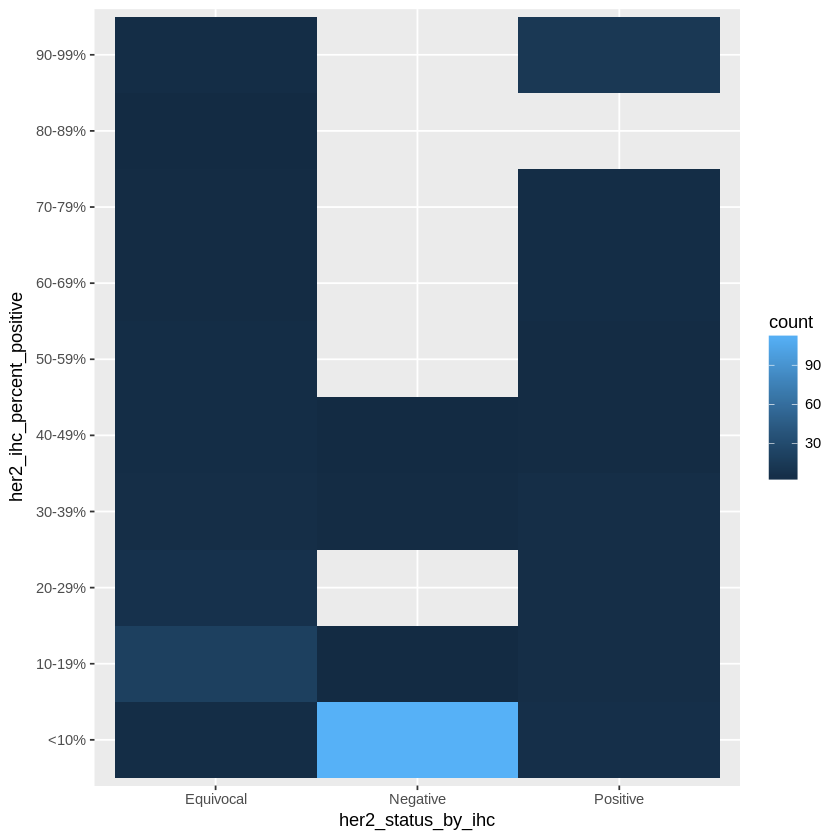

In [7]:
gdot <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]'), ], aes(x = her2_status_by_ihc, y = her2_ihc_percent_positive))
ggdot <- gdot + geom_bin2d()

ggdot

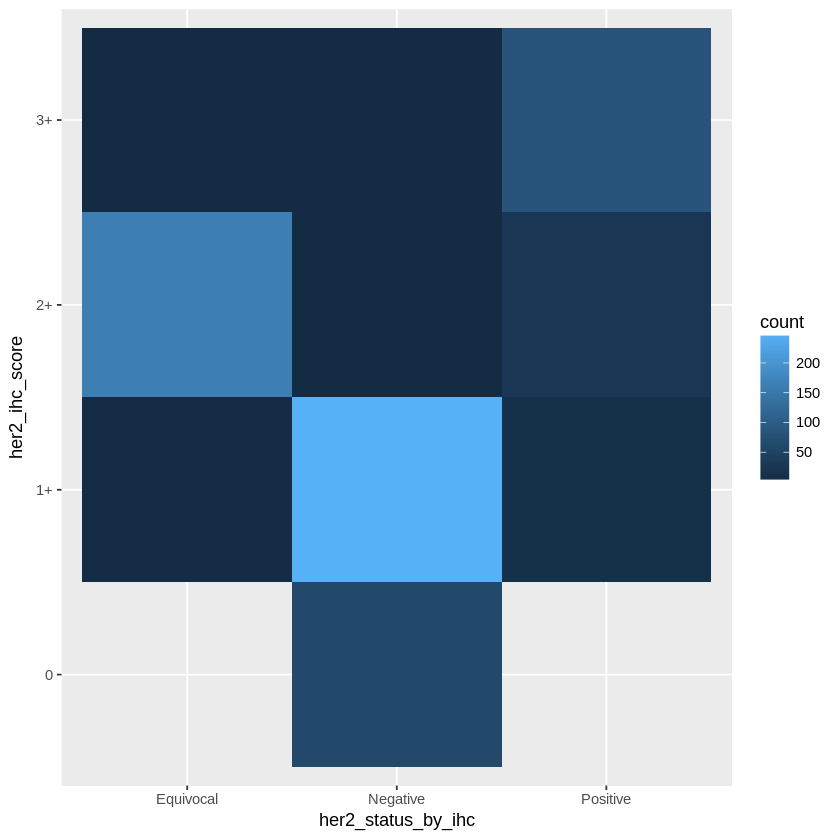

In [8]:
gdot <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]'), ], aes(x = her2_status_by_ihc, y = her2_ihc_score))
ggdot <- gdot + geom_bin2d()

ggdot

This one is a little more telling since we can clearly see that a good amount of Negative sample intersects with 1+, Equivocal with 2+, and Positive with 3+.

## Histograms

Here I divide up by status so we can see where most samples within a certain status fall.

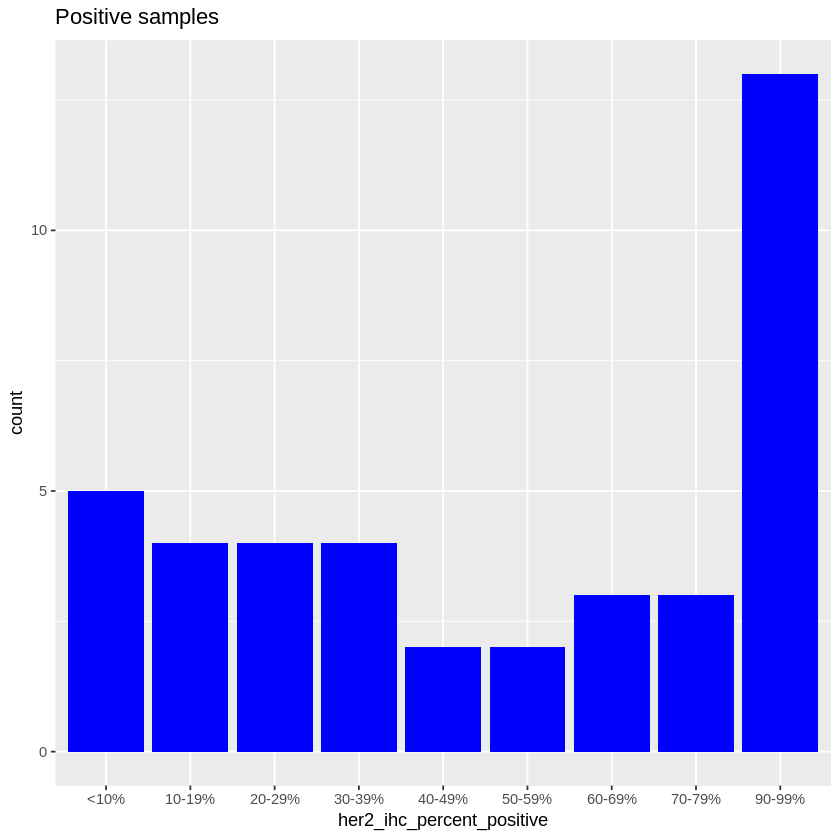

In [9]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]' & her2.data$her2_status_by_ihc == "Positive"), ], 
               aes(x = her2_ihc_percent_positive))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Positive samples")

ggbar

It is important to note here that there is no 80-89% group with Positive samples.

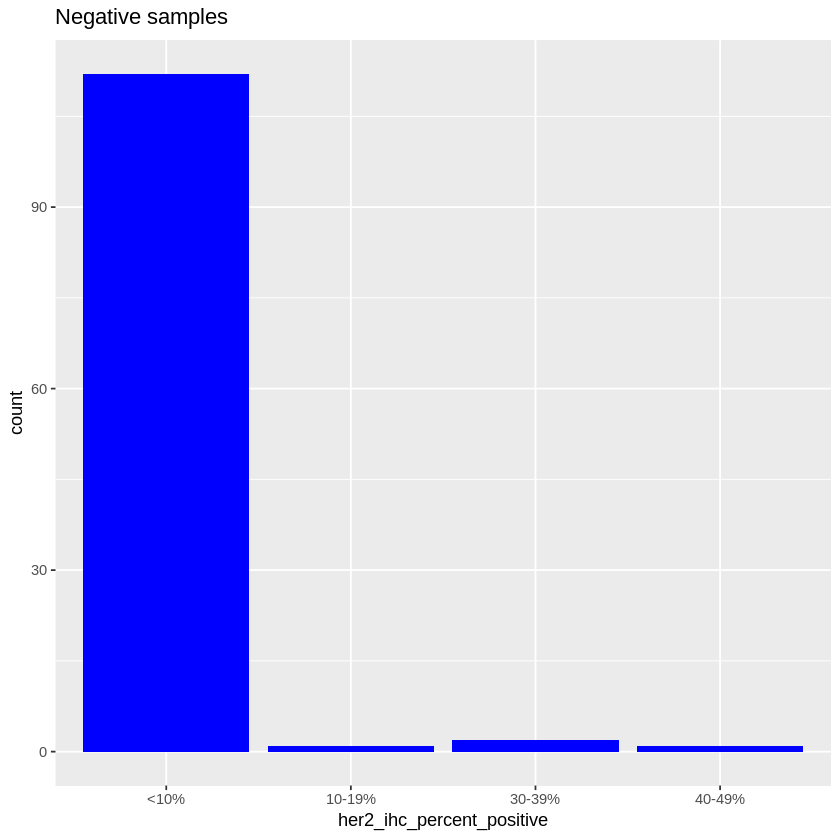

In [10]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]' & her2.data$her2_status_by_ihc == "Negative"), ], 
               aes(x = her2_ihc_percent_positive))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Negative samples")

ggbar

Again, the sheer amount of Negative-<10% samples far outweighs others. This is to be expected if we trust the way we judge percent positivity and classify status.

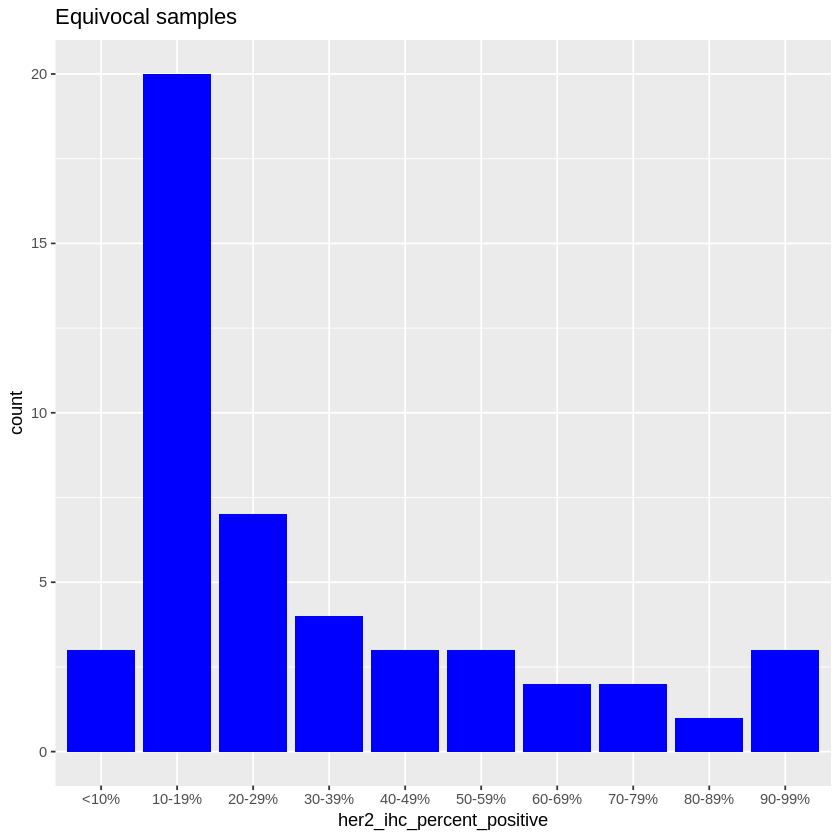

In [11]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_percent_positive != '[Not Available]' & her2.data$her2_status_by_ihc == "Equivocal"), ], 
               aes(x = her2_ihc_percent_positive))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Equivocal samples")

ggbar

It seems there are Equivocal samples all across the board. However, it does appear that a good portion are found in the 10-19% range. This is likely because it is slightly higher than an almost certain negative, but is still not high enough to be sure. Thus, it is an ambiguous area that is classified as "Equivocal". However, the majority of the samples are still found outside of this range...

In [12]:
nrow(her2.data[which(her2.data$her2_ihc_percent_positive == "10-19%"),]) / 
        nrow(her2.data[which(her2.data$her2_ihc_percent_positive != "10-19%" & her2.data$her2_ihc_percent_positive != "[Not Available]"),])

[1] 0.1396648

Only 14% of the samples are found within this range. We could also consider 20-29% and 30-39%

In [13]:
nrow(her2.data[which(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%")),]) / 
        nrow(her2.data[which(!(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%", "[Not Available]"))),])

[1] 0.2911392

How many are in each of these groups?

In [14]:
nrow(her2.data[which(her2.data$her2_ihc_percent_positive == "10-19%"),])
nrow(her2.data[which(her2.data$her2_ihc_percent_positive != "10-19%" & her2.data$her2_ihc_percent_positive != "[Not Available]"),])
nrow(her2.data[which(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%")),])
nrow(her2.data[which(!(her2.data$her2_ihc_percent_positive %in% c("10-19%", "20-29%", "30-39%", "[Not Available]"))),])

[1] 25

[1] 179

[1] 46

[1] 158

Nuts. That math adds up. Anyway, my point is that while the 10-19% group makes it most likely to be considered 'Equivocal', it could happen anywhere.

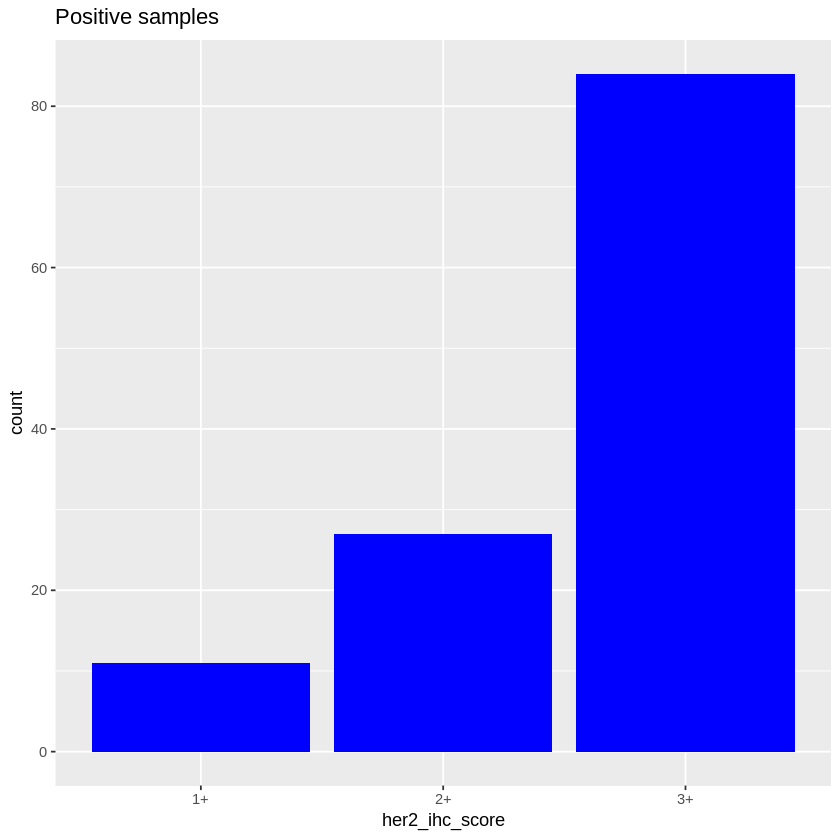

In [15]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]' & her2.data$her2_status_by_ihc == "Positive"), ], 
               aes(x = her2_ihc_score))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Positive samples")

ggbar

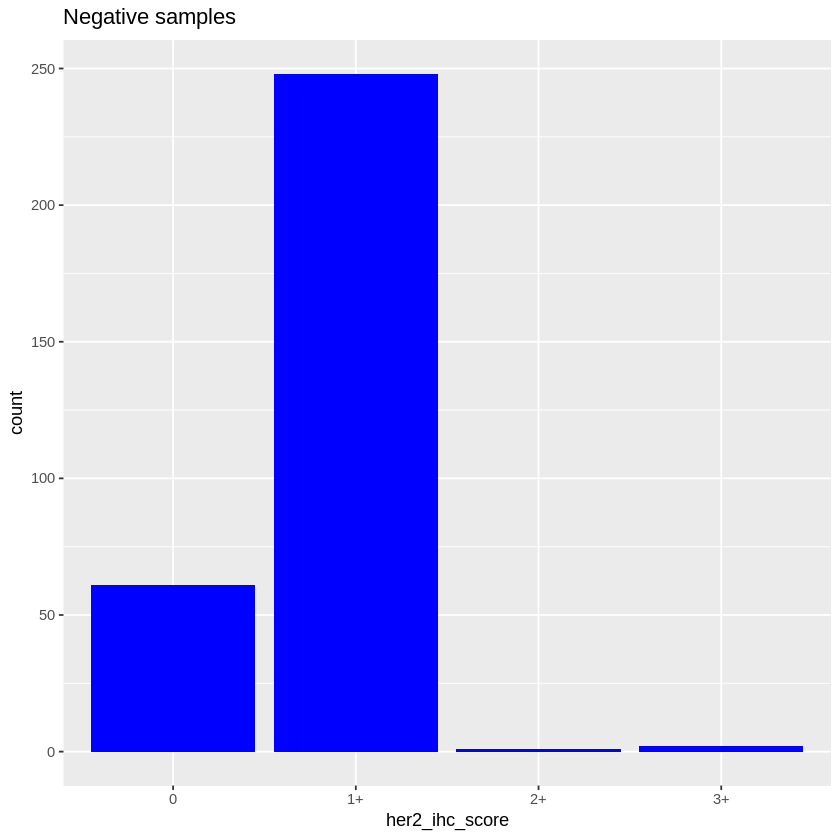

In [16]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]' & her2.data$her2_status_by_ihc == "Negative"), ], 
               aes(x = her2_ihc_score))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Negative samples")

ggbar

__SPOILER ALERT:__ It looks like a her2 score of 0 ensures Negativity.

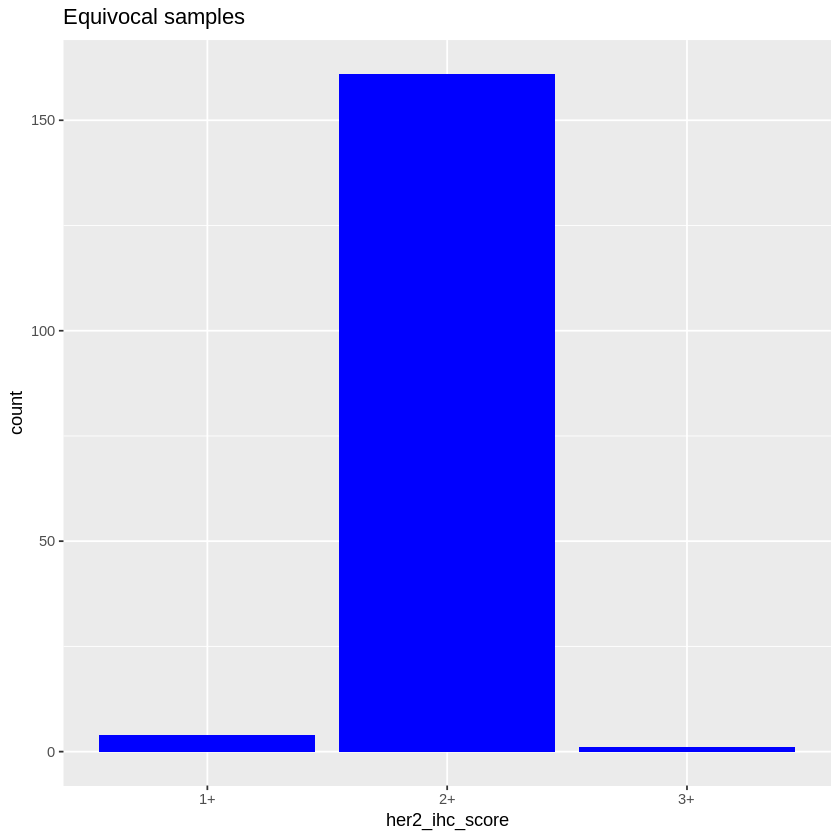

In [17]:
gbar <- ggplot(her2.data[which(her2.data$her2_ihc_score != '[Not Available]' & her2.data$her2_status_by_ihc == "Equivocal"), ], 
               aes(x = her2_ihc_score))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Equivocal samples")

ggbar

## Equivocal fish status and copy number

Apparently, if `status_by_ihc` is `equivocal`, they use fish status and copy number to determine the status of the sample. Because of this, I'm going to look at those variables within samples that are listed as `equivocal` under `status_by_ihc`.

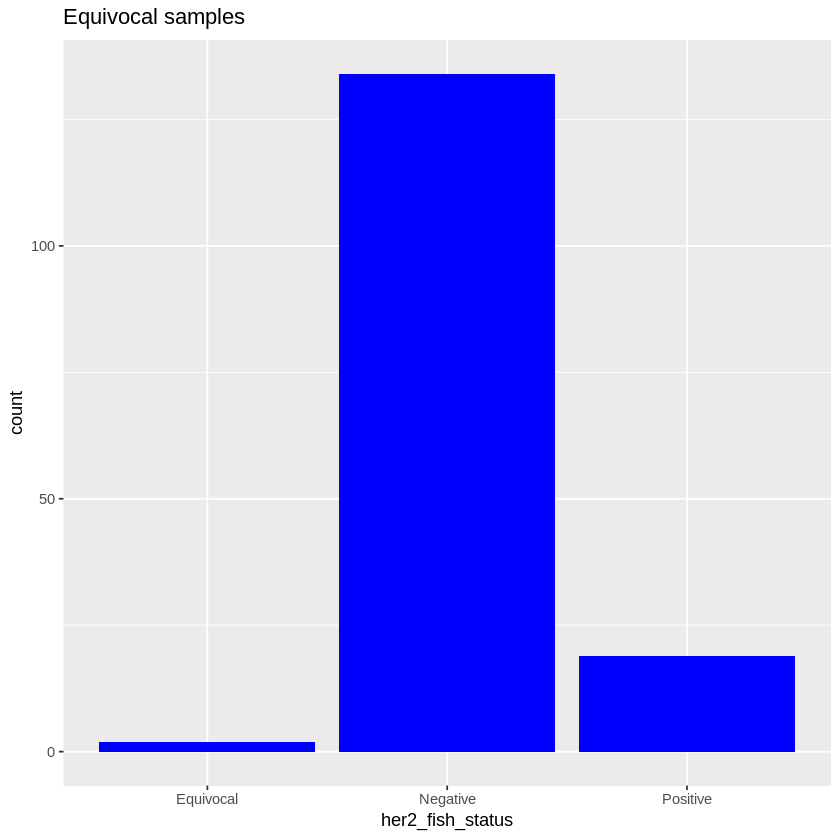

In [18]:
gbar <- ggplot(her2.data[which(her2.data$her2_fish_status != '[Not Evaluated]' & her2.data$her2_fish_status != '[Not Available]' & her2.data$her2_status_by_ihc == "Equivocal"), ], 
               aes(x = her2_fish_status))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Equivocal samples")

ggbar

So it looks like equivocal by ihc samples are mostly negative according to the fish status.

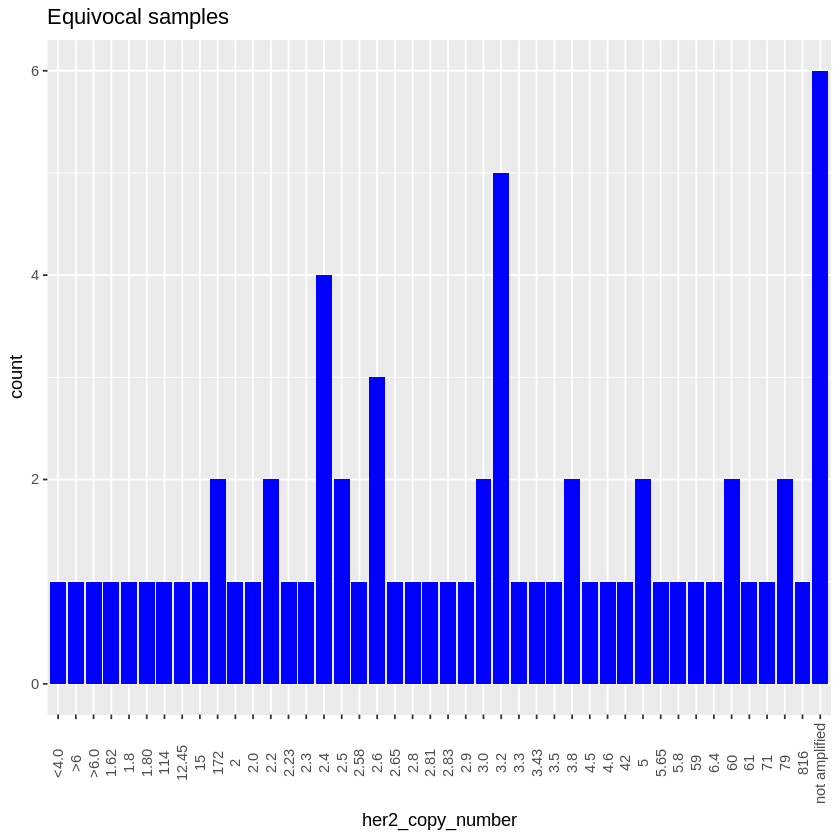

In [19]:
gbar <- ggplot(her2.data[which(her2.data$her2_copy_number != '[Not Evaluated]' & her2.data$her2_copy_number != '[Not Available]' & her2.data$her2_status_by_ihc == "Equivocal"), ], 
               aes(x = her2_copy_number))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Equivocal samples") +
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

ggbar

__WHAT IS THIS__ This seems completely nonsensical (there's a sample with >6 and then a sample with 816 copies? I've tried looking into this and have yet to find answers

I'm going to look at Positive and Negative samples to try and makes sense of this.

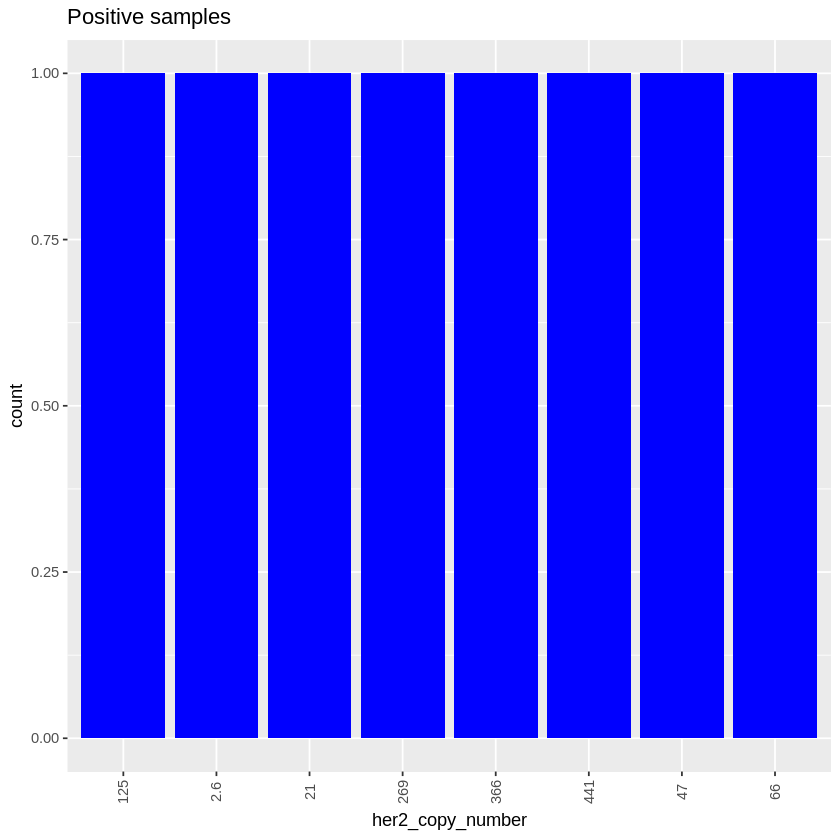

In [20]:
gbar <- ggplot(her2.data[which(her2.data$her2_copy_number != '[Not Evaluated]' & her2.data$her2_copy_number != '[Not Available]' & her2.data$her2_status_by_ihc == "Positive"), ], 
               aes(x = her2_copy_number))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Positive samples") +
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

ggbar

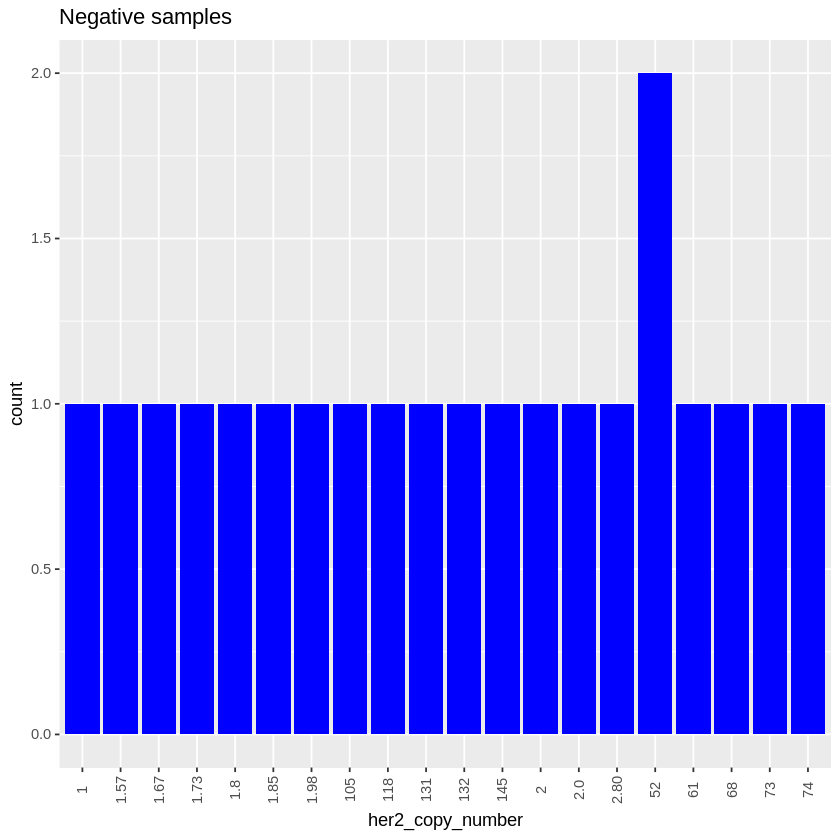

In [21]:
gbar <- ggplot(her2.data[which(her2.data$her2_copy_number != '[Not Evaluated]' & her2.data$her2_copy_number != '[Not Available]' & her2.data$her2_status_by_ihc == "Negative"), ], 
               aes(x = her2_copy_number))
ggbar <- gbar + geom_bar(fill = "blue") + labs(title = "Negative samples") +
            theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

ggbar

__*NOPE, STILL DOESN'T MAKE ANY SENSE*__

Since that essentially means nothing, I'm going to just move on to the next portion

## Comparing the classification of 3+ scoring Positive samples vs. 0 scoring Negative samples

I'm going to just grab the Positive samples that score 3+ and the Negative samples that score 0 to see if that improves accuracy. This is an important test since this 0 scoring is the only group that is only considered negative and this could agree with the trend of ERBB2's connection to HER2 positivity.

In [22]:
score.data <- her2.data[which((her2.data$her2_status_by_ihc == "Positive" & her2.data$her2_ihc_score == "3+") | 
                              (her2.data$her2_status_by_ihc == "Negative" & her2.data$her2_ihc_score == "0")), ]

In [23]:
tmp.gene.expr <- gene.expr[which(row.names(gene.expr) %in% row.names(score.data)),]
score.expr <- merge(tmp.gene.expr, score.data[, c("her2_status_by_ihc", "her2_ihc_score")], by = "row.names")

In [24]:
row.names(score.expr) <- score.expr$Row.names
score.expr$Row.names <- NULL
#colnames(score.expr)[names(score.expr) == 'y'] <- "her2_status_by_ihc"

In [25]:
#score.expr

#write.table(score.expr, file = "../data/pos_and_neg_by_score.tsv", quote = F, sep = "\t", col.names = NA)

In [29]:
pos.neg.aucs <- as.data.frame(read_tsv("../results/AUC/posneg_aucs.tsv"))

pos.neg.aucs
max(pos.neg.aucs$auc)

Parsed with column specification:
cols(
  model = col_character(),
  method = col_character(),
  auc = col_double()
)


model,method,auc
LR,vsd_robust,0.9027149
LR,vsd_robust,0.9583333
LR,vsd_robust,0.8406863
LR,vsd_robust,0.8872549
LR,vsd_robust,0.9687500
LR,vsd_robust,0.8167421
LR,vsd_robust,0.9289216
LR,vsd_robust,0.8284314
LR,vsd_robust,0.9117647
LR,vsd_robust,0.7083333


[1] 1

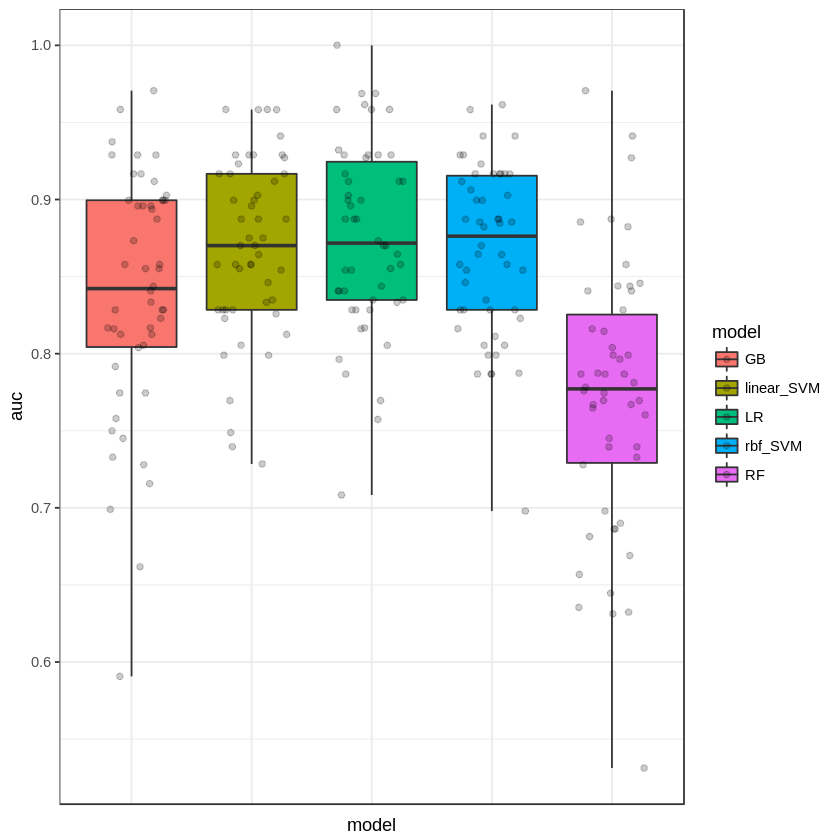

In [27]:
gbox <- ggplot(pos.neg.aucs, aes(x = model, y = auc, fill = model))
ggbox <- gbox + geom_boxplot(coef = 25) + geom_jitter(width = .3, alpha = .2) +
            theme_bw() +
            theme(axis.ticks.x = element_blank(), 
                  axis.text.x = element_blank())

ggbox

Sure enough, accuracy is improved (see UNFINISHED section [here](https://nbviewer.jupyter.org/github/zence/SCCR/blob/Kumiko/notebooks/scaling_methods_p3.ipynb))

Although we see that GradientBoosting is no longer the best performer and even the SVMs outperformed it. I believe in large part that this is due to SVM's inability to deal with noisy data. It is a fairly accurate algorithm, but is greatly affected by the data given. GradientBoosting stays more constant, despite how noisy the data is.

In [33]:
pos.neg.aucs$group <- seq(1, nrow(pos.neg.aucs))

pos.neg.aucs$group <- factor(pos.neg.aucs$group, levels = pos.neg.aucs$group[order(pos.neg.aucs$auc)])

In [41]:
pos.neg.minmax <- data.frame(model = character(), method = character(), auc = numeric())
for (model in unique(pos.neg.aucs$model)){
    mini.pos.neg <- pos.neg.aucs[which(pos.neg.aucs$model == model),]
    pos.neg.minmax <- rbind(pos.neg.minmax, mini.pos.neg[which(mini.pos.neg$auc == max(mini.pos.neg$auc)),])
    pos.neg.minmax <- rbind(pos.neg.minmax, mini.pos.neg[which(mini.pos.neg$auc == min(mini.pos.neg$auc)),])
}

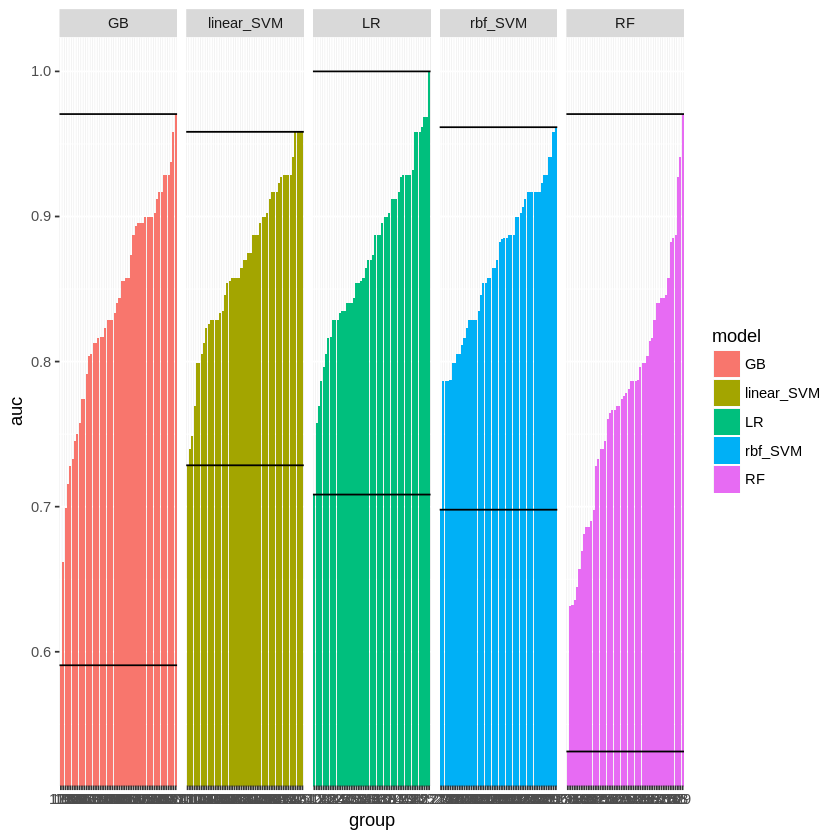

In [45]:
gbar <- ggplot(pos.neg.aucs, aes(x = group, y = auc, fill = model))
ggbar <- gbar + geom_bar(stat = "identity") +
            facet_grid(. ~ model, scales = 'free', space = 'free') +
            coord_cartesian(ylim = c(min(pos.neg.aucs$auc), 1)) +
            geom_hline(data = pos.neg.minmax, aes(yintercept = auc))

ggbar


I just realized that I essentially made the prior graph, but this time with bars. So yeah.